In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import KMeans
colors = ['b','g','r','c','m','y']

In [3]:
df = pd.read_csv("kmeans_dataframe.csv")

In [4]:
print(f"Available Distance types are: {KMeans.KMeans.dist_types_built}")

Available Distance types are: ['Euclidean', 'Manhattan', 'Minkowski', 'Supremum']


In [8]:
# Plotting scatter for each iteration
def plot_scatter(ax,kmeans,new_cent):
    global colors
    points = kmeans.points
    for i in range(len(points)):
        if i in kmeans.cent_list:
            pass
        else:
            ax.scatter(points[i].x,points[i].y,c=colors[new_cent[i]])
    for i in range(len(kmeans.centroids)):
        ax.scatter(kmeans.centroids[i].x,kmeans.centroids[i].y,c="k",marker="*")

In [23]:
# Creating an KMeans class instance
kmeans = KMeans.KMeans(df,3,"Euclidean")
curr_cent = kmeans.set_centroids(cent_list=[4,10,8])
print(f"Centroid points (wrt to dataset): {curr_cent}")

Centroid points (wrt to dataset): [4, 10, 8]


[1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 0, 1]
[1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 1]
[1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 1]


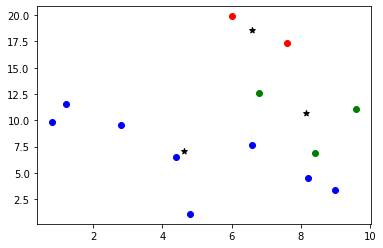

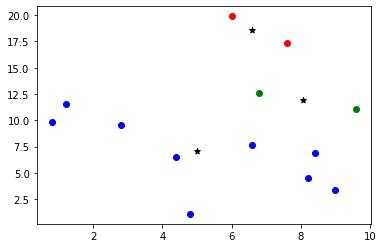

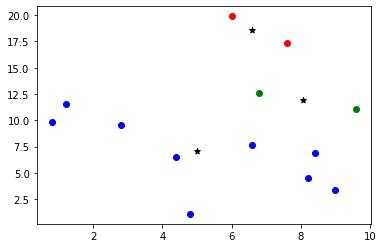

In [24]:
#classification = kmeans.kmeans_iter()
#print(classification)
new_cent = curr_cent
i = 0
while True:
    fig, ax = plt.subplots(1,1)
    new_cent = kmeans._kmeans_cluster()[0]
    print(list(new_cent))
    plot_scatter(ax,kmeans,list(new_cent))
    if new_cent == curr_cent:
        break
    plt.savefig(f"{i}.png",dpi=300)
    curr_cent = new_cent
    i+=1